In [1]:
import pandas as pd
import numpy as np

In [5]:
jailbooking.shape

(28579, 8)

In [6]:
person['personid']

0       1091432.0
1       1079692.0
2       1090664.0
3       1070144.0
4       1057848.0
5       1081401.0
6       1087470.0
7       1090082.0
8       1084898.0
9       1092215.0
10      1028338.0
11      1092962.0
12      1084953.0
13      1088321.0
14      1088530.0
15      1089372.0
16      1077209.0
17      1009581.0
18      1083805.0
19      1081262.0
20      1092581.0
21      1096012.0
22      1084302.0
23      1049187.0
24      1043164.0
25      1095106.0
26      1035226.0
27      1091874.0
28      1092292.0
29      1079391.0
          ...    
6698    1080422.0
6699    1092422.0
6700    1080342.0
6701    1092884.0
6702    1086830.0
6703    1094237.0
6704    1017433.0
6705    1093262.0
6706    1088030.0
6707    1082822.0
6708    1080777.0
6709    1093021.0
6710    1095449.0
6711    1021505.0
6712    1094359.0
6713    1095775.0
6714    1079253.0
6715    1079738.0
6716    1060735.0
6717    1082628.0
6718    1086170.0
6719    1086273.0
6720    1082602.0
6721    1082330.0
6722    10

In [7]:
jailbooking.columns

Index(['mni_no', 'case_no', 'booking_no', 'arresting_agency', 'booking_date',
       'release_date', 'bail_type', 'bail_amt'],
      dtype='object')

In [8]:
jailbooking.mni_no.nunique()

22110

In [9]:
mni_df = jailbooking.groupby(['mni_no']).size().reset_index(name='re-entry')

In [10]:
mni_df.tail()

,mni_no,re-entry
22105,708359,1
22106,708392,1
22107,708400,1
22108,708479,1
22109,708490,1


In [11]:
mni_df.head()

,mni_no,re-entry
0,14,1
1,180,2
2,216,2
3,240,1
4,329,1


In [12]:
mni_df['re-entry'] = np.where(mni_df['re-entry']>1, 1, 0)

In [13]:
mni_df.head()

,mni_no,re-entry
0,14,0
1,180,1
2,216,1
3,240,0
4,329,0


In [14]:
jail = jailbooking.merge(mni_df, how="left")

In [15]:
jail.tail()

,mni_no,case_no,booking_no,arresting_agency,booking_date,release_date,bail_type,bail_amt,re-entry
28574,688407,15JV00582,16000536,LENEXA P.D.,2016-04-29 00:00:00,2016-05-03 00:00:00,NaN,NaN,1
28575,698651,16JV00653,16000537,OLATHE P.D.,2016-04-29 00:00:00,2016-05-02 00:00:00,NaN,NaN,0
28576,679706,16JV00651,16000538,SHAWNEE P.D.,2016-04-30 00:00:00,2016-05-05 00:00:00,NaN,NaN,0
28577,675005,15JV00503,16000539,OVERLAND PARK P.D.,2016-04-30 00:00:00,2016-05-19 00:00:00,NaN,NaN,1
28578,554805,16JV00652,16000543,OVERLAND PARK P.D.,2016-04-30 00:00:00,2016-05-02 00:00:00,NaN,NaN,0


In [16]:
person.drop(['tract2010id', 'blockgroup2010id', 'block2010id'], inplace=True, axis=1)

In [17]:
person.columns

Index(['personid', 'mni_no', 'dob', 'race', 'gender', 'city', 'state', 'zip'], dtype='object')

In [18]:
jail_ppl = jail.merge(person, how="left", on="mni_no")

In [19]:
jail_ppl.shape

(28579, 16)

In [20]:
mentalhealth = pd.read_csv("mentalhealth.csv")

In [21]:
mentalhealth.columns

Index(['personid', 'dob', 'race', 'sex', 'city', 'state', 'zip', 'tract2010id',
       'blockgroup2010id', 'block2010id', 'admit_date', 'dschrg_date',
       'program', 'pri_dx_code', 'pri_dx_value', 'refferal_source'],
      dtype='object')

In [22]:
mentalhealth.shape

(26097, 16)

In [23]:
mentalhealth.drop(['dob','city', 'race', 'sex', 'state', 'zip', 'tract2010id',
       'blockgroup2010id', 'block2010id'], inplace=True, axis=1)

In [24]:
jail_ppl.head()

,mni_no,case_no,booking_no,arresting_agency,booking_date,release_date,bail_type,bail_amt,re-entry,personid,dob,race,gender,city,state,zip
0,488544,09CR03128,10000005,OLATHE P.D.,2010-01-01 00:00:00,2010-05-23 00:00:00,PR,7500.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,167776,10DV00011,10000008,GARDNER P.D.,2010-01-01 00:00:00,2010-01-04 00:00:00,SUR,5000.0,1,1079925.0,1981-05-21 00:00:00.0,W,M,Lawrence,KS,66046-3250
2,594130,10CR00011,10000010,SHAWNEE P.D.,2010-01-01 00:00:00,2010-01-02 00:00:00,SUR,6000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,82738,10DV00004,10000017,OVERLAND PARK P.D.,2010-01-01 00:00:00,2010-01-02 00:00:00,SUR,1500.0,0,1080427.0,1968-06-19 00:00:00.0,W,M,Overland Park,KS,66212
4,481746,10DV00013,10000020,OLATHE P.D.,2010-01-01 00:00:00,2010-01-05 00:00:00,SUR,15000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#Convert column type from string to datetime
jail_ppl['booking_date'] = pd.to_datetime(jail_ppl['booking_date'])
jail_ppl['release_date'] = pd.to_datetime(jail_ppl['release_date'])
jail_ppl['booking_days'] = jail_ppl['release_date'] - jail_ppl['booking_date']

In [26]:
#Convert the days type to integer 
jail_ppl['booking_days'] = jail_ppl['booking_days'].astype('timedelta64[D]')

In [27]:
jail_ppl.drop(['booking_date','release_date'], inplace=True, axis=1)

In [28]:
jail_ppl.head()

,mni_no,case_no,booking_no,arresting_agency,bail_type,bail_amt,re-entry,personid,dob,race,gender,city,state,zip,booking_days
0,488544,09CR03128,10000005,OLATHE P.D.,PR,7500.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.0
1,167776,10DV00011,10000008,GARDNER P.D.,SUR,5000.0,1,1079925.0,1981-05-21 00:00:00.0,W,M,Lawrence,KS,66046-3250,3.0
2,594130,10CR00011,10000010,SHAWNEE P.D.,SUR,6000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,82738,10DV00004,10000017,OVERLAND PARK P.D.,SUR,1500.0,0,1080427.0,1968-06-19 00:00:00.0,W,M,Overland Park,KS,66212,1.0
4,481746,10DV00013,10000020,OLATHE P.D.,SUR,15000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [29]:
mentalhealth = mentalhealth.dropna(subset = ['personid'])

In [30]:
mentalhealth.head()

,personid,admit_date,dschrg_date,program,pri_dx_code,pri_dx_value,refferal_source
1,1012840.0,2003-06-16 00:00:00,NaN,ADULT MH PROGRAM,F25.0,"Schizoaffective disorder, bipolar type",Self
2,1054604.0,2012-10-30 00:00:00,NaN,ADULT MH PROGRAM,F31.64,"Bipolar disord, crnt episode mixed, severe, w ...",Self
3,1102739.0,2008-01-28 00:00:00,NaN,ADULT MH PROGRAM,F31.30,"Bipolar disord, crnt epsd depress, mild or mod...",Self
4,1098897.0,2006-10-04 00:00:00,NaN,ADULT MH PROGRAM,F90.0,"Attn-defct hyperactivity disorder, predom inat...",Self
5,1057771.0,2003-05-02 00:00:00,NaN,ADULT MH PROGRAM,F25.0,"Schizoaffective disorder, bipolar type",Self


In [31]:
mentalhealth['dschrg_date'].fillna('2018-01-01 00:00:00', inplace = True)

In [32]:
#Convert column type from string to datetime
mentalhealth['admit_date'] = pd.to_datetime(mentalhealth['admit_date'])
mentalhealth['dschrg_date'] = pd.to_datetime(mentalhealth['dschrg_date'], errors='ignore')
mentalhealth['treatment_days'] = mentalhealth['dschrg_date'] - mentalhealth['admit_date']

In [33]:
#Convert the days type to integer 
mentalhealth['treatment_days'] = mentalhealth['treatment_days'].astype('timedelta64[D]')

In [34]:
mentalhealth.treatment_days.head()

1    5313.0
2    1889.0
3    3626.0
4    4107.0
5    5358.0
Name: treatment_days, dtype: float64

In [35]:
def Detect_missing_value(df):
    '''
    Find out the columns have missing values

    Input:
        pandas dataframe
 
    Returns:
        a list of those column names
    '''
    rv = []
    for col in df.columns:
        if df[col].count() < df.shape[0]:
            rv.append(col)
            print(col, "has missing values.")
    return rv

In [36]:
jail_ppl = jail_ppl.dropna(subset = ['personid'])

In [37]:
jail_ppl.shape

(9136, 15)

In [38]:
health = mentalhealth[["personid", "treatment_days"]]

In [39]:
health.head()

,personid,treatment_days
1,1012840.0,5313.0
2,1054604.0,1889.0
3,1102739.0,3626.0
4,1098897.0,4107.0
5,1057771.0,5358.0


In [40]:
df = pd.merge(jail_ppl, health, on="personid", how='left')

In [41]:
df.shape

(9823, 16)

In [42]:
df.personid.nunique()

6556

In [43]:
df.tail()

,mni_no,case_no,booking_no,arresting_agency,bail_type,bail_amt,re-entry,personid,dob,race,gender,city,state,zip,booking_days,treatment_days
9818,386507,15JV01408,15001276,MISSION P.D.,PR,750.0,1,1075036.0,1998-02-03 00:00:00.0,W,F,Mission,KS,66202,17.0,248.0
9819,388197,15JV01406,15001312,OLATHE P.D.,NaN,NaN,1,1082668.0,1998-02-16 00:00:00.0,W,M,Overland Park,KS,66202,19.0,106.0
9820,459495,14JV00909,15001408,JOHNSON COUNTY SHERIFF'S DEPARTMENT,NaN,NaN,1,1087638.0,1998-07-30 00:00:00.0,B,M,Merriam,KS,66203,23.0,NaN
9821,388197,15JV01406,16000075,JOHNSON COUNTY SHERIFF'S DEPARTMENT,NaN,NaN,1,1082668.0,1998-02-16 00:00:00.0,W,M,Overland Park,KS,66202,30.0,106.0
9822,409499,16JV00281,16000257,MERRIAM P.D.,NaN,NaN,0,1084674.0,2000-10-26 00:00:00.0,B,M,Merriam,KS,66203,1.0,NaN


In [44]:
df['treatment_days'].fillna(-1, inplace = True)

In [45]:
df

,mni_no,case_no,booking_no,arresting_agency,bail_type,bail_amt,re-entry,personid,dob,race,gender,city,state,zip,booking_days,treatment_days
0,167776,10DV00011,10000008,GARDNER P.D.,SUR,5000.0,1,1079925.0,1981-05-21 00:00:00.0,W,M,Lawrence,KS,66046-3250,3.0,-1.0
1,82738,10DV00004,10000017,OVERLAND PARK P.D.,SUR,1500.0,0,1080427.0,1968-06-19 00:00:00.0,W,M,Overland Park,KS,66212,1.0,-1.0
2,457048,10CR00037,10000030,OLATHE P.D.,NaN,NaN,0,1086672.0,1979-03-23 00:00:00.0,W,M,Shawnee,KS,66226,50.0,-1.0
3,369139,10CR00010,10000033,LENEXA P.D.,CA,5000.0,1,1095350.0,1972-08-02 00:00:00.0,W,M,NaN,NaN,NaN,13.0,-1.0
4,110321,09CR02898,10000041,JOHNSON COUNTY SHERIFF'S DEPARTMENT,SUR,7500.0,1,1085452.0,1976-02-05 00:00:00.0,W,F,Shawnee,KS,66227,13.0,-1.0
5,182469,10DV00006,10000046,OLATHE P.D.,PR,15000.0,1,1017990.0,1977-09-06 00:00:00.0,W,M,Olathe,KS,66061,74.0,0.0
6,182469,10DV00006,10000046,OLATHE P.D.,PR,15000.0,1,1017990.0,1977-09-06 00:00:00.0,W,M,Olathe,KS,66061,74.0,112.0
7,424447,10CR00002,10000056,JOHNSON COUNTY SHERIFF'S DEPARTMENT,NaN,NaN,1,1080979.0,1985-02-25 00:00:00.0,B,M,Kansas City,KS,66104-4246,49.0,-1.0
8,366140,10CR00015,10000081,OVERLAND PARK P.D.,SUR,7500.0,0,1081361.0,1975-02-25 00:00:00.0,W,M,Overland Park,KS,66207,2.0,-1.0
9,272057,10DV00015,10000089,OVERLAND PARK P.D.,SUR,2500.0,0,1084974.0,1981-03-09 00:00:00.0,W,M,Overland Park,KS,66209,1.0,-1.0


In [46]:
df['mental_health'] = np.where(df['treatment_days']>=0.0, 1, 0)

In [47]:
df.tail()

,mni_no,case_no,booking_no,arresting_agency,bail_type,bail_amt,re-entry,personid,dob,race,gender,city,state,zip,booking_days,treatment_days,mental_health
9818,386507,15JV01408,15001276,MISSION P.D.,PR,750.0,1,1075036.0,1998-02-03 00:00:00.0,W,F,Mission,KS,66202,17.0,248.0,1
9819,388197,15JV01406,15001312,OLATHE P.D.,NaN,NaN,1,1082668.0,1998-02-16 00:00:00.0,W,M,Overland Park,KS,66202,19.0,106.0,1
9820,459495,14JV00909,15001408,JOHNSON COUNTY SHERIFF'S DEPARTMENT,NaN,NaN,1,1087638.0,1998-07-30 00:00:00.0,B,M,Merriam,KS,66203,23.0,-1.0,0
9821,388197,15JV01406,16000075,JOHNSON COUNTY SHERIFF'S DEPARTMENT,NaN,NaN,1,1082668.0,1998-02-16 00:00:00.0,W,M,Overland Park,KS,66202,30.0,106.0,1
9822,409499,16JV00281,16000257,MERRIAM P.D.,NaN,NaN,0,1084674.0,2000-10-26 00:00:00.0,B,M,Merriam,KS,66203,1.0,-1.0,0


In [48]:
cols_to_fill = Detect_missing_value(df)

bail_type has missing values.
bail_amt has missing values.
city has missing values.
state has missing values.
zip has missing values.
booking_days has missing values.


In [49]:
def Fill_in(df, cols, method="mean"):
    '''
    Filling in missing values with "mean", "median" or "mode"
    
    Inputs:
        pandas dataframe
        a list of those column names
        method (string): mean, median or mode
 
    Returns:
        pandas dataframe
    '''
    for col in cols:
        if method =='mean':
            val = df[col].mean()
        elif method =='median':
            val = df[col].median()
        elif method =='mode':
            val = df[col].mode()
        df[col] = df[col].fillna(val)
        print ('Filling missing value for {} using {}'.format(col, method))
    return df

In [57]:
Fill_in(df, ["bail_amt", "booking_days"],'median')

Filling missing value for bail_amt using median
Filling missing value for booking_days using median


,mni_no,case_no,booking_no,arresting_agency,bail_type,bail_amt,re-entry,personid,dob,race,gender,city,state,zip,booking_days,treatment_days,mental_health
0,167776,10DV00011,10000008,GARDNER P.D.,SUR,5000.0,1,1079925.0,1981-05-21 00:00:00.0,W,M,Lawrence,KS,66046-3250,3.0,-1.0,0
1,82738,10DV00004,10000017,OVERLAND PARK P.D.,SUR,1500.0,0,1080427.0,1968-06-19 00:00:00.0,W,M,Overland Park,KS,66212,1.0,-1.0,0
2,457048,10CR00037,10000030,OLATHE P.D.,NaN,2500.0,0,1086672.0,1979-03-23 00:00:00.0,W,M,Shawnee,KS,66226,50.0,-1.0,0
3,369139,10CR00010,10000033,LENEXA P.D.,CA,5000.0,1,1095350.0,1972-08-02 00:00:00.0,W,M,NaN,NaN,NaN,13.0,-1.0,0
4,110321,09CR02898,10000041,JOHNSON COUNTY SHERIFF'S DEPARTMENT,SUR,7500.0,1,1085452.0,1976-02-05 00:00:00.0,W,F,Shawnee,KS,66227,13.0,-1.0,0
5,182469,10DV00006,10000046,OLATHE P.D.,PR,15000.0,1,1017990.0,1977-09-06 00:00:00.0,W,M,Olathe,KS,66061,74.0,0.0,1
6,182469,10DV00006,10000046,OLATHE P.D.,PR,15000.0,1,1017990.0,1977-09-06 00:00:00.0,W,M,Olathe,KS,66061,74.0,112.0,1
7,424447,10CR00002,10000056,JOHNSON COUNTY SHERIFF'S DEPARTMENT,NaN,2500.0,1,1080979.0,1985-02-25 00:00:00.0,B,M,Kansas City,KS,66104-4246,49.0,-1.0,0
8,366140,10CR00015,10000081,OVERLAND PARK P.D.,SUR,7500.0,0,1081361.0,1975-02-25 00:00:00.0,W,M,Overland Park,KS,66207,2.0,-1.0,0
9,272057,10DV00015,10000089,OVERLAND PARK P.D.,SUR,2500.0,0,1084974.0,1981-03-09 00:00:00.0,W,M,Overland Park,KS,66209,1.0,-1.0,0


In [53]:
#2 explore
def create_graph(df, x, method='mean', graph_type='line'):
    '''
    Generate distribution graph for specific variable
    
    Input:
        df: (pandas dataframe)
        x(string): the variable/attribute you want to explore
        graph_typee(string): the type of graph you want to draw: line, bar, scatter
        method (string): mean, median or sum
        
    Return:
        a graph for a selected attribute. 
    '''
    y = 're-entry'
    cols = [x, y]
    if method == 'mean':
        var = df[cols].groupby(x).mean()
    elif method == 'median':
        var = df[cols].groupby(x).median()
    elif method == 'sum':
        var = df[cols].groupby(x).sum()
    graph = var.plot(kind=graph_type, use_index=False, figsize=(8,4))


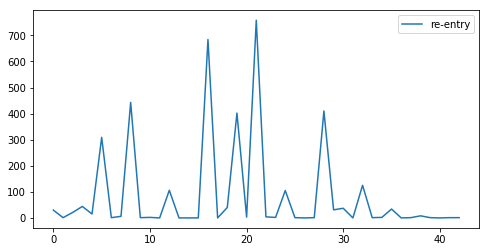

In [55]:
create_graph(df, 'bail_amt', 'sum')

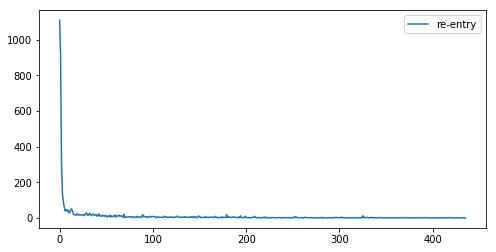

In [60]:
create_graph(df, 'booking_days', 'sum')

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [64]:
def corr_matrix(df):
    '''
    Creates a heatmap that shows the correlations between the different variables in a dataframe.
    
    Input:
        df: a dataframe
        title: name of the correlation_matrix
        
    Return:
        Outputs a heatmatrix showing correlations
    
    
    '''
    f, ax = plt.subplots(figsize=(10, 8))
    corr = df.corr()
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values, 
                mask=np.zeros_like(corr, dtype=np.bool), 
                cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

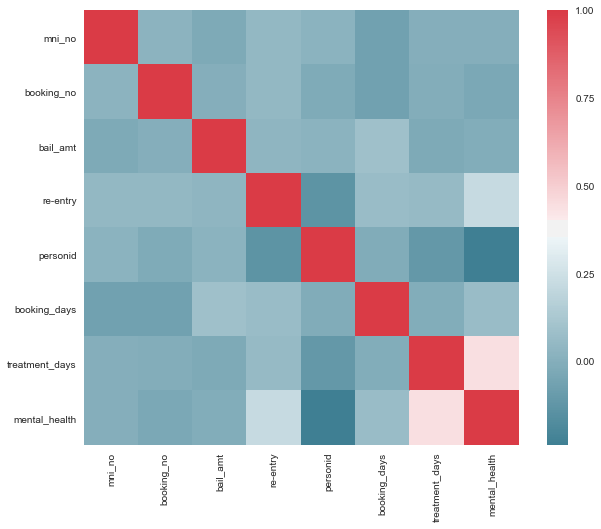

In [65]:
corr_matrix(df)

In [ ]:
df.to_csv('df.csv', index=False)